In [1]:
import pandas as pd
import numpy as np

# not skipping empty values, to demonstrate data preprocessing steps later
df = pd.read_csv('D2.csv', na_filter=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB


# TASK 1

## What pre-processing was required on the dataset (D2.csv) before building the clustering model and why?

In [2]:
print(df['contacts_count'].unique())
print(df['contacts_count'].value_counts())

[ 9.  2.  5.  6. 21. 10.  4.  0. 12.  1. 20.  8. 16.  3.  7. 15. 14. 19.
 13. 18. 11. 17.]
contacts_count
21.0    668
1.0     608
5.0     577
10.0    560
3.0     543
4.0     538
2.0     476
6.0     370
20.0    265
8.0     257
0.0     213
7.0     190
15.0    171
12.0     99
9.0      76
14.0     34
19.0     34
11.0     33
16.0     29
13.0     26
18.0     14
17.0      8
Name: count, dtype: int64


In [3]:
print(df['covid19_positive'].unique())
print(df['covid19_positive'].value_counts())

[1 0]
covid19_positive
0    3454
1    2335
Name: count, dtype: int64


In [4]:
print(df['smoking'].unique())
print(df['smoking'].value_counts())

['never' 'yesmedium' 'quit0' 'quit10' 'quit5' 'yesheavy' 'yeslight' 'vape']
smoking
never        3749
quit5         485
quit10        473
quit0         319
vape          247
yesmedium     230
yeslight      206
yesheavy       80
Name: count, dtype: int64


In [5]:
print(df['alcohol'].unique())
print(df['alcohol'].value_counts())

[ 0.  2.  1. 12. 10.  3. 14.  4. 13.  6.  7.  5.  8.  9. 11.]
alcohol
2.0     2424
0.0     1275
1.0      612
3.0      310
4.0      247
5.0      194
7.0      166
14.0     117
10.0     108
6.0       86
13.0      72
12.0      64
8.0       48
9.0       39
11.0      27
Name: count, dtype: int64


In [6]:
print(df['height'].unique())
print(df['height'].value_counts())

[188 164 170 192 180 168 176 166 178 186 172 184 156 138 182 160 158 124
 162 122 118 174 154 150 152 194 144 190 198 148 196 200 136 112 210 146
 110 134 126 128 130 204 114 202 120 216 116 238 228]
height
168    421
178    413
172    410
164    405
174    405
170    366
176    357
166    351
184    323
182    304
162    297
180    274
158    206
186    205
160    202
188    170
156    142
154    137
190     94
192     69
194     49
152     41
150     27
196     21
198     15
148     14
136     13
134      5
200      5
146      5
138      5
144      5
126      4
112      3
204      3
122      3
128      2
114      2
202      2
118      2
110      2
210      2
124      2
130      1
120      1
216      1
116      1
238      1
228      1
Name: count, dtype: int64


In [7]:
print(df['weight'].unique())
print(df['weight'].value_counts())

[104  62  78  60  64 100  90  70  66  84 110 112  94  86  82  88  50  96
 140  68  54 102 130  92 114  72  98  58 108  56  52 116  74  80 118 176
 180  44  76 120 106 150 156 128  48 122 132 136 124 166 160 138  46 174
 144 148 134 152 178 126 142 146 158 168 162 164 154 170]
weight
74     271
82     267
70     253
80     240
84     235
      ... 
164      4
174      3
166      3
154      2
170      2
Name: count, Length: 68, dtype: int64


In [8]:
print(df['age'].unique())
print(df['age'].value_counts())

['20_30' '70_80' '40_50' '30_40' '50_60' '60_70' '10_20' '0_10' '100_110']
age
30_40      1412
40_50      1111
20_30       996
50_60       926
60_70       765
70_80       354
10_20       205
0_10         14
100_110       6
Name: count, dtype: int64


In [9]:
print(df['worried'].unique())
print(df['worried'].value_counts())

[3. 4. 2. 5. 1.]
worried
4.0    3350
3.0    1674
5.0     377
2.0     342
1.0      46
Name: count, dtype: int64


In [10]:
print(df['working'].unique())
print(df['working'].value_counts())

['travel non critical' 'never' 'stopped' 'travel critical' 'home']
working
stopped                1774
never                  1577
travel critical        1312
travel non critical     620
home                    506
Name: count, dtype: int64


In [11]:
print(df['contacts_count'].dtype)
print(df['worried'].dtype)
print(df['alcohol'].dtype)

float64
float64
float64


In [12]:
print(df['contacts_count'].astype(int))
print(df['worried'].astype(int))
print(df['alcohol'].astype(int))

0        9
1        2
2        5
3        6
4        2
        ..
5784     3
5785    20
5786    20
5787    10
5788    21
Name: contacts_count, Length: 5789, dtype: int64
0       3
1       3
2       3
3       3
4       4
       ..
5784    4
5785    4
5786    3
5787    3
5788    4
Name: worried, Length: 5789, dtype: int64
0       0
1       0
2       2
3       2
4       2
       ..
5784    3
5785    2
5786    2
5787    2
5788    2
Name: alcohol, Length: 5789, dtype: int64


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  height_dist = sns.distplot(df['height'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


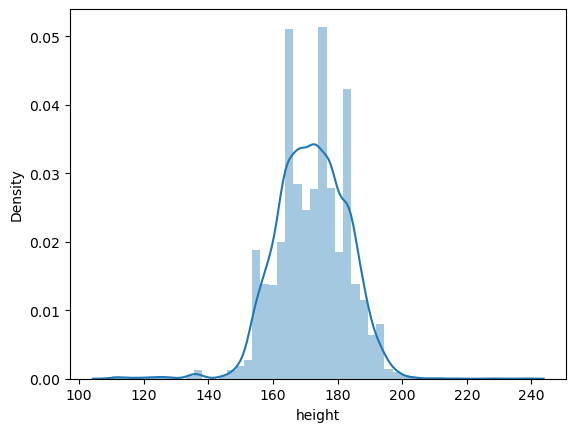

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  weight_dist = sns.distplot(df['weight'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


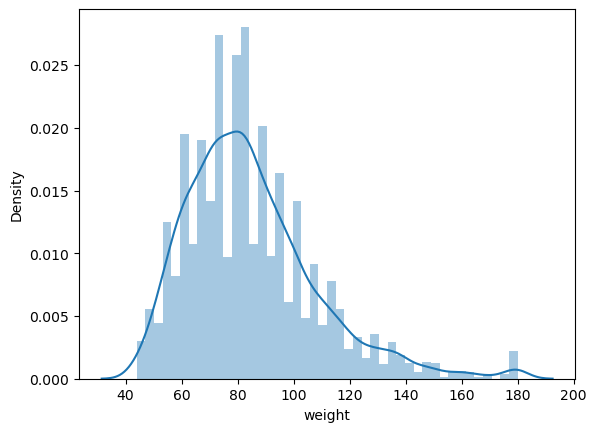

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  alcohol_dist = sns.distplot(df['alcohol'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


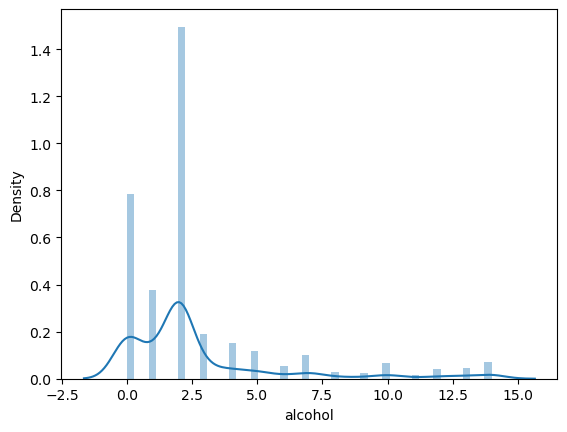

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  contactscount_dist = sns.distplot(df['contacts_count'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


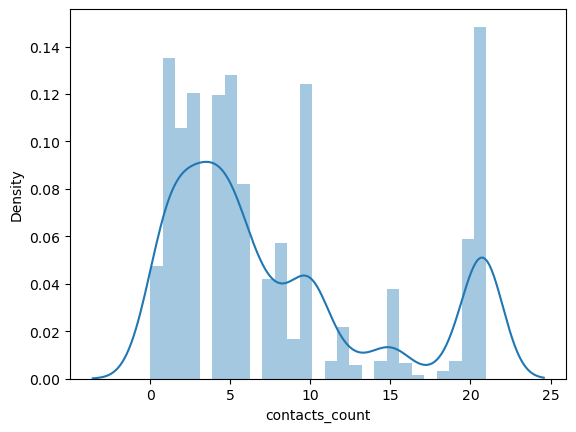

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  worried_dist = sns.distplot(df['worried'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


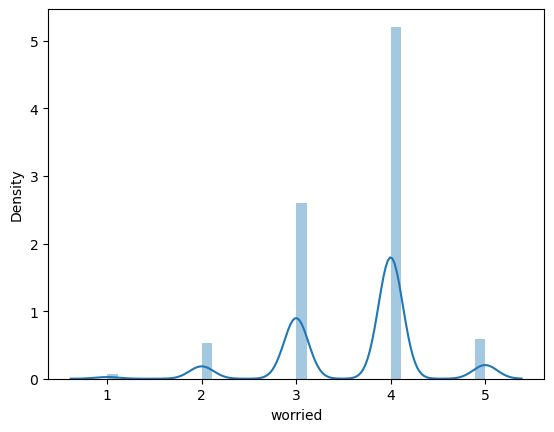

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/809672668.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  covid19pos_dist = sns.distplot(df['covid19_positive'].dropna())
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


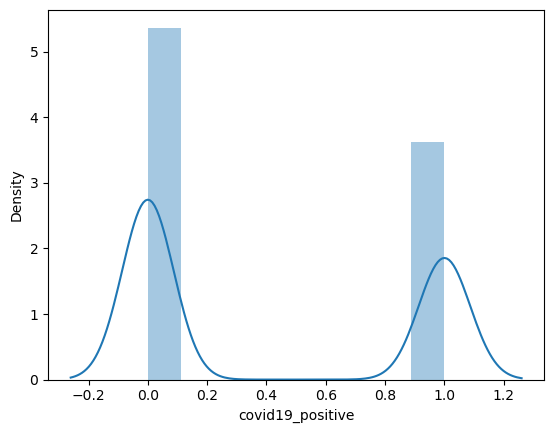

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


height_dist = sns.distplot(df['height'].dropna())
plt.show()


weight_dist = sns.distplot(df['weight'].dropna())
plt.show()

alcohol_dist = sns.distplot(df['alcohol'].dropna())
plt.show()

contactscount_dist = sns.distplot(df['contacts_count'].dropna())
plt.show()

worried_dist = sns.distplot(df['worried'].dropna())
plt.show()

covid19pos_dist = sns.distplot(df['covid19_positive'].dropna())
plt.show()

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/4033627333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  contactscount_dist = sns.distplot(df['contacts_count'].dropna(), bins=100)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


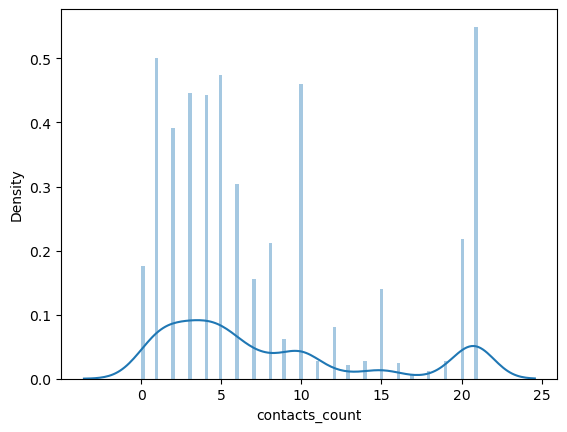

In [14]:
# Distribution of cc, with increased number of bins. More bins = more specific distplot.
contactscount_dist = sns.distplot(df['contacts_count'].dropna(), bins=100)
plt.show()

/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/220332287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  weight_dist = sns.distplot(df['weight'].dropna(), bins=100)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


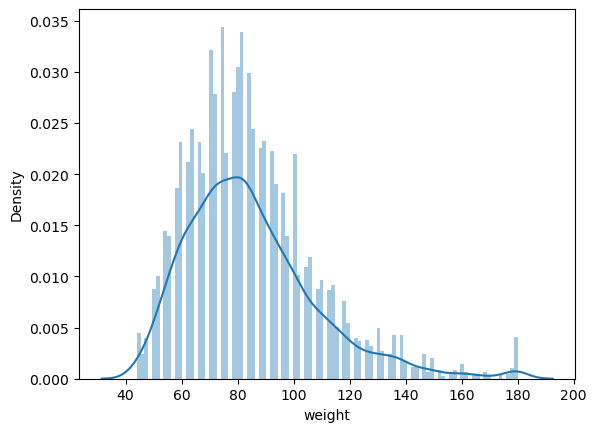

In [15]:
# Distribution of w, with increased number of bins. More bins = more specific distplot.
weight_dist = sns.distplot(df['weight'].dropna(), bins=100)
plt.show()

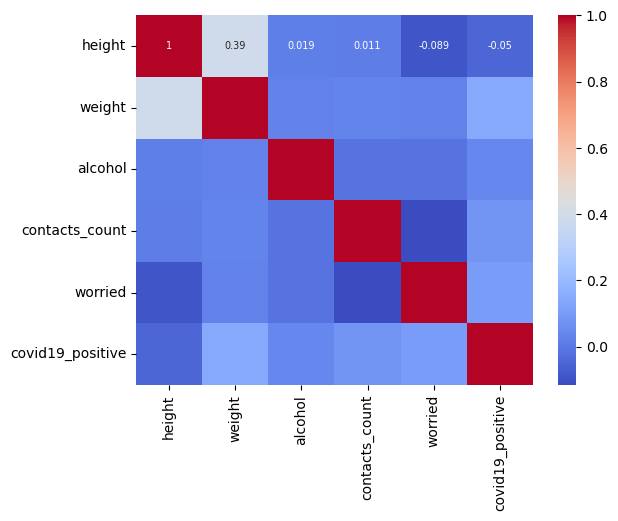

In [16]:
import seaborn as sns
df2 = df.select_dtypes(include=[np.number])
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size":7})
plt.show()


### categorical data

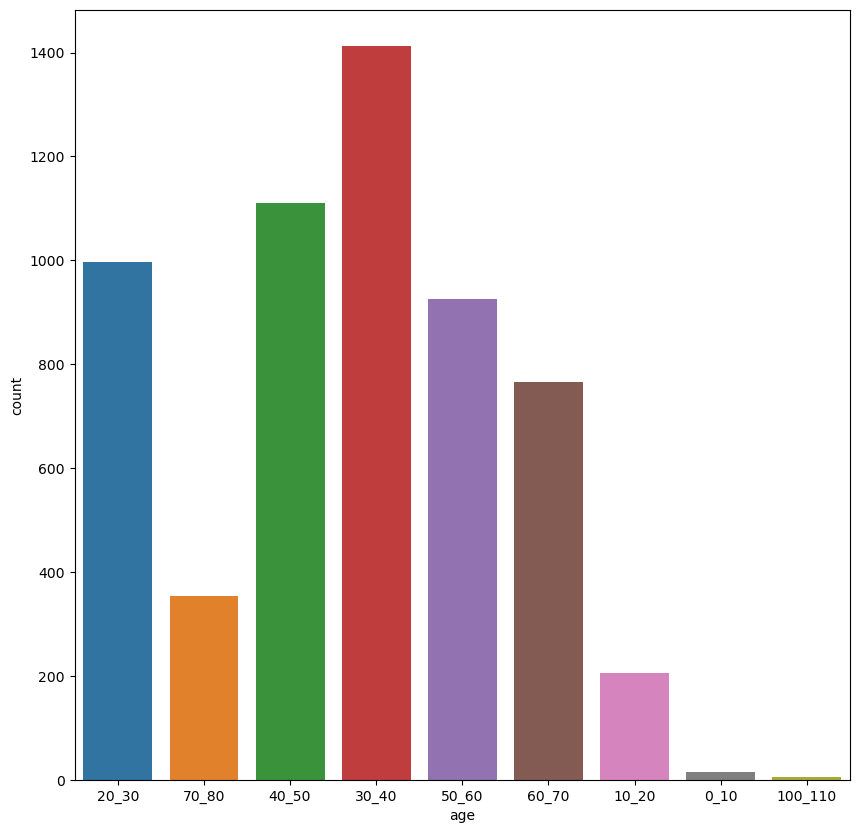

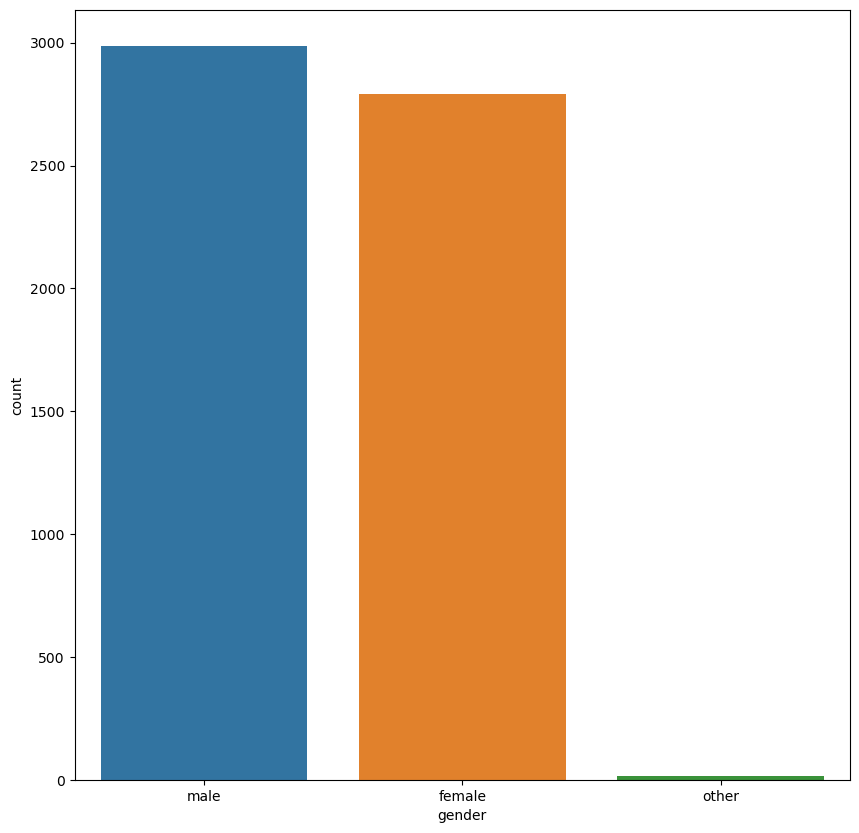

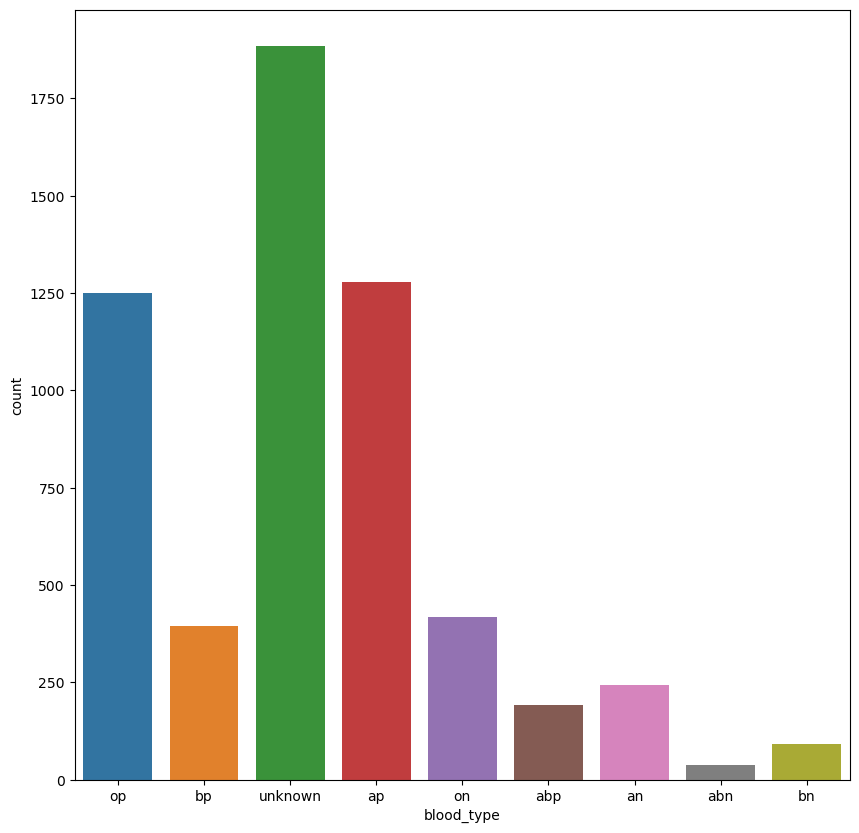

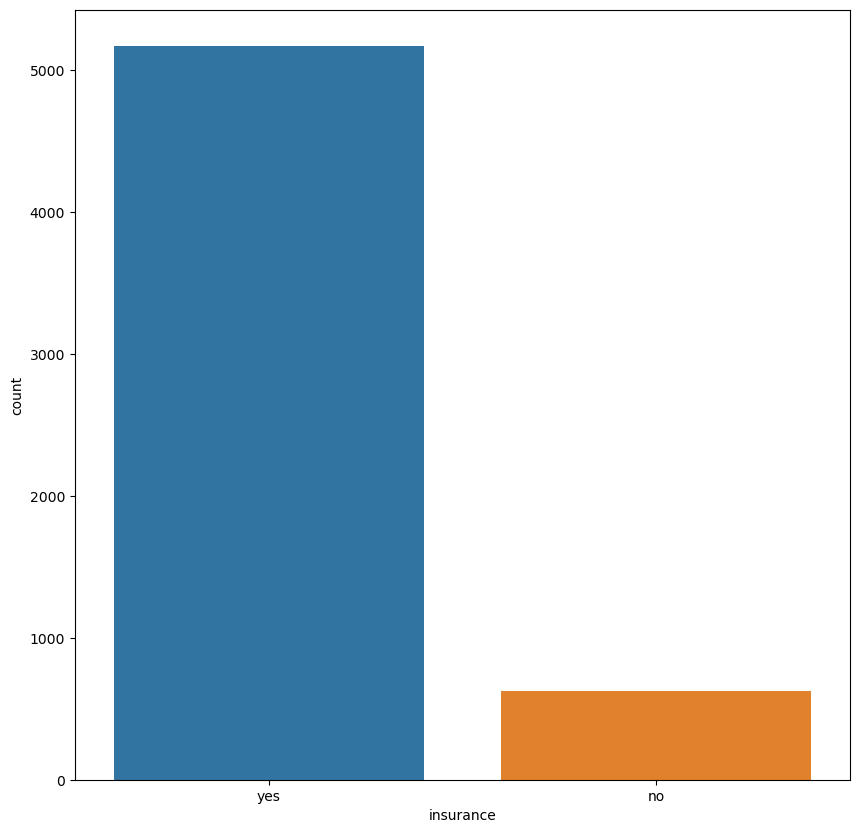

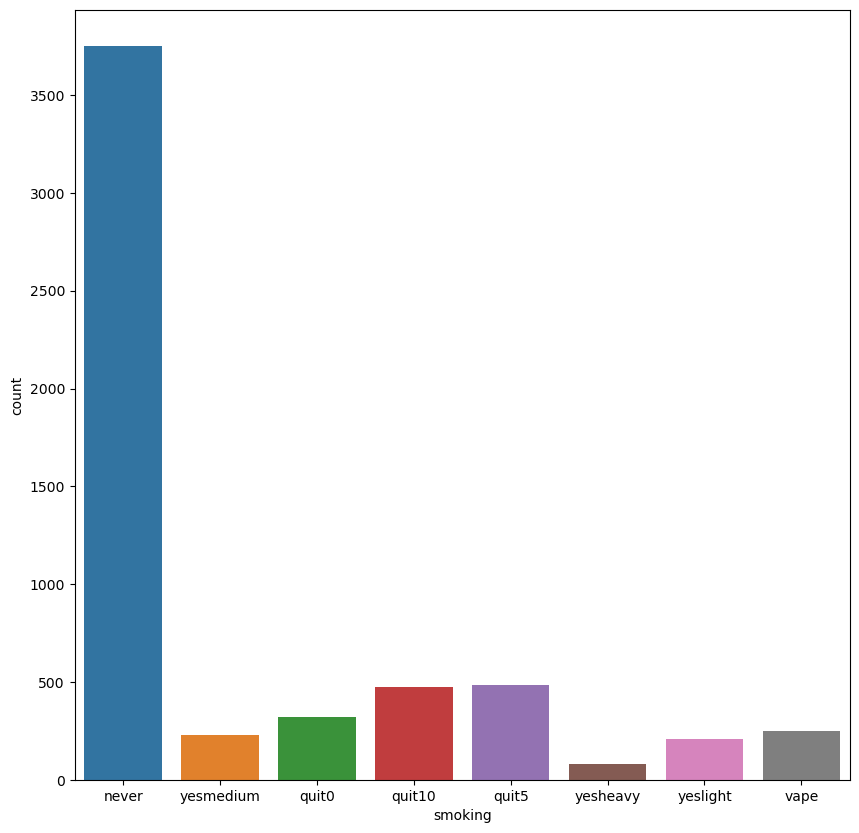

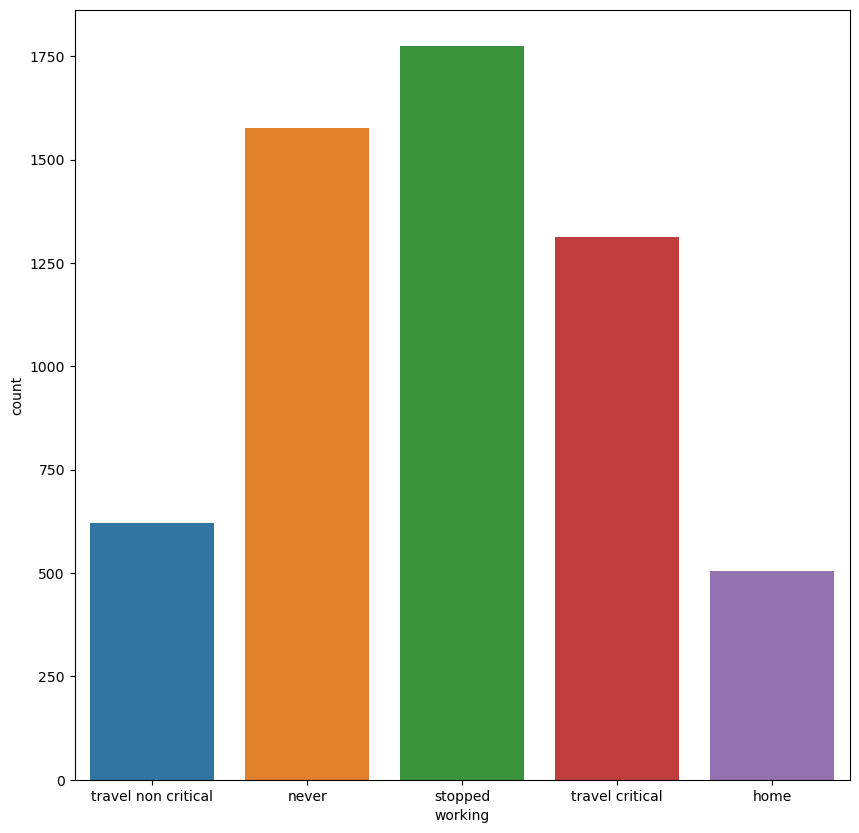

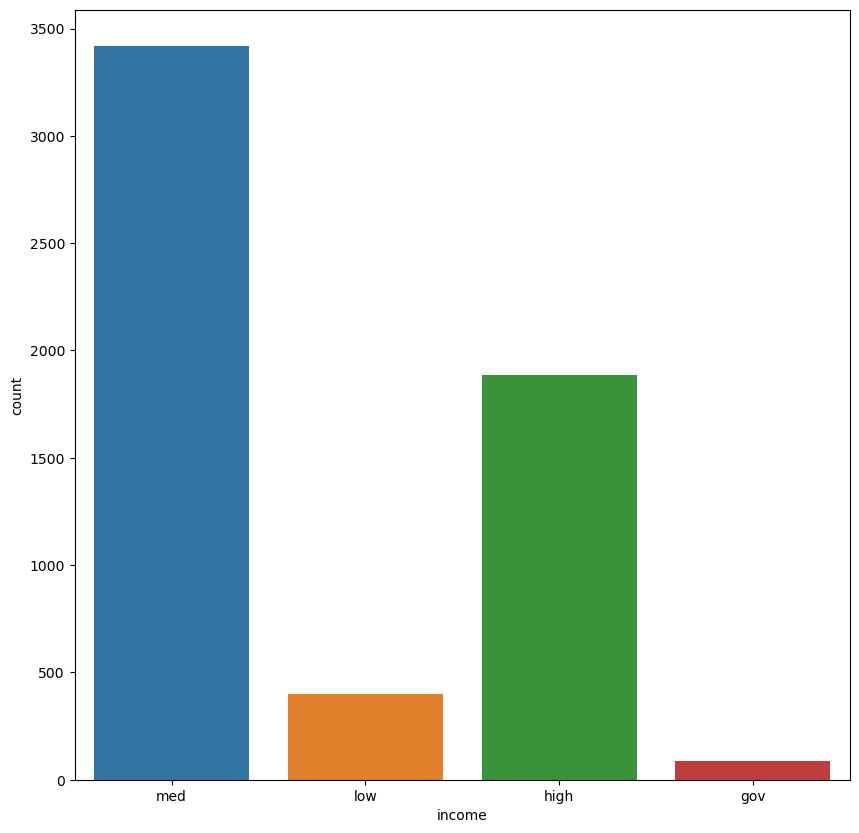

In [17]:
categorical_data = ['age', 'gender', 'blood_type', 'insurance', 'smoking', 'working', 'income']

for i in categorical_data:
    fig, ax = plt.subplots(figsize = (10,10))
    dg=sns.countplot(data=df, x=i).set(xlabel = i)
    plt.show()

In [18]:
df['blood_type'].unique()

array(['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn'],
      dtype=object)

In [19]:
#treating unknown with equally distribution based on ratio (A1)
np.random.seed(42)
def pick_value(ratio, values):
    total_parts = sum(ratio)
    normalized_ratio = [part / total_parts for part in ratio]
    selected_value = np.random.choice(values, p=normalized_ratio)
    return selected_value

In [20]:
correct_blood_type_data = df.loc[df['blood_type'] != 'unknown', 'blood_type']
ratio = correct_blood_type_data.value_counts()/len(correct_blood_type_data)
ratio

blood_type
ap     0.327529
op     0.320359
on     0.106786
bp     0.100896
an     0.062484
abp    0.048912
bn     0.023303
abn    0.009731
Name: count, dtype: float64

In [21]:
blood_types = ratio.index.tolist()
ratio = ratio.values.tolist()

In [22]:
blood_types

['ap', 'op', 'on', 'bp', 'an', 'abp', 'bn', 'abn']

In [23]:
ratio

[0.32752880921895006,
 0.3203585147247119,
 0.10678617157490397,
 0.10089628681177977,
 0.06248399487836107,
 0.048911651728553135,
 0.023303457106274007,
 0.009731113956466069]

In [24]:
# before:
df['blood_type'].value_counts()

blood_type
unknown    1884
ap         1279
op         1251
on          417
bp          394
an          244
abp         191
bn           91
abn          38
Name: count, dtype: int64

In [25]:
update_data = []
for _ in range(len(df.loc[df['blood_type'] == 'unknown'].index)):
    update_data.append(pick_value(ratio, blood_types))

df.loc[df['blood_type'] == 'unknown', 'blood_type'] = update_data

In [26]:
# check
df['blood_type'].value_counts()

blood_type
ap     1908
op     1839
on      614
bp      577
an      367
abp     287
bn      142
abn      55
Name: count, dtype: int64

### selected variable: 

- age ?



- height
- weight
- alcohol
- contacts count
- worried
- covid19pos

# TASK 2

## Build a clustering model to profile the characteristics of COVID positive individuals based on the variables containing numerical data. Answer the followings:

### a. What clustering algorithm have you used and why?

#### K MEANS as it is commmonly used for numerical data

### b. List the attributes used in this analysis.

- age_numerical (later on next question)
- height
- weight
- contacts_count
- worried
- covid19_positive

### c. What is the optimal number of clusters identified? How did you reach this optimal number?

In [27]:
from sklearn.preprocessing import StandardScaler

# take num variables and drop the rest
df2 = df[['height', 'weight', 'contacts_count','worried','covid19_positive']]

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.cluster import KMeans
# random state, we will use 42 instead of 10 for a change
rs = 42
# set the random state. different random state seeds might result in different centroids lo
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum of intra-cluster distance: 19640.828894804494
Centroid locations:
[ 0.00213218  0.0465671   1.73185215 -0.19809476  0.18342364]
[-0.1040791   0.17233231 -0.48241397  0.15552866  1.21623564]
[ 0.06284303 -0.1251777  -0.43477689 -0.01172619 -0.82220909]


In [29]:

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

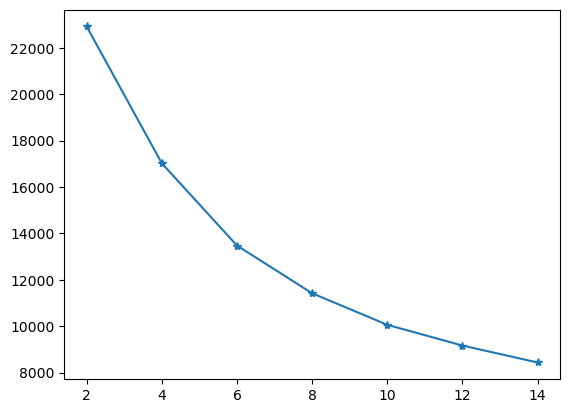

In [30]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

#### can use k = 4 or k=6

### using silhouette score

In [31]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.24378508154511827
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.23422033426859593


`silhouette_score` returns a mean silhouette score of 0.24 for $K=4$ and 0.23 for $K=6$. This shows clusters in $K=4$ are more appropriately matched to its own cluster then $K=6$. Therefore, we could choose $K=4$ over $K=6$ on the basis of this score.

### Did you normalize/standardize the variables? What was its effect on the model – Does the variable normalization/standardization process enable a better clustering solution?

#### By performing standardization, you ensure that all your numerical features have a similar scale, which is important for clustering algorithms like KMeans that use distance-based metrics. Standardization prevents features with larger scales from dominating the distance calculations during clustering. Regarding the effect of standardization on the clustering solution, it generally enables a better clustering solution by ensuring that all features contribute equally to the clustering process. Features with larger scales could otherwise disproportionately influence the clustering algorithm. By standardizing the features, you remove this bias and allow the algorithm to consider each feature equally when determining cluster assignments.

### 3. For the model with the optimal number of clusters, answer the following. 
### a. Visualize the clusters using ‘pairplot’ and interpret the visualization

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum of intra-cluster distance: 17025.480012640586
Centroid locations:
[-0.12592091  0.15902979 -0.50191556  0.26080333  1.21623564]
[-0.02600373  0.06990141  1.78890408  0.04412873  0.33122385]
[ 0.18222901 -0.11741261 -0.17091039 -1.27664251 -0.69756147]
[-0.00464855 -0.10333093 -0.46689701  0.70850413 -0.82220909]
Cluster membership
Cluster_ID
3    1739
0    1660
2    1341
1    1049
Name: count, dtype: int64


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2214640681.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster_ID'] = y
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

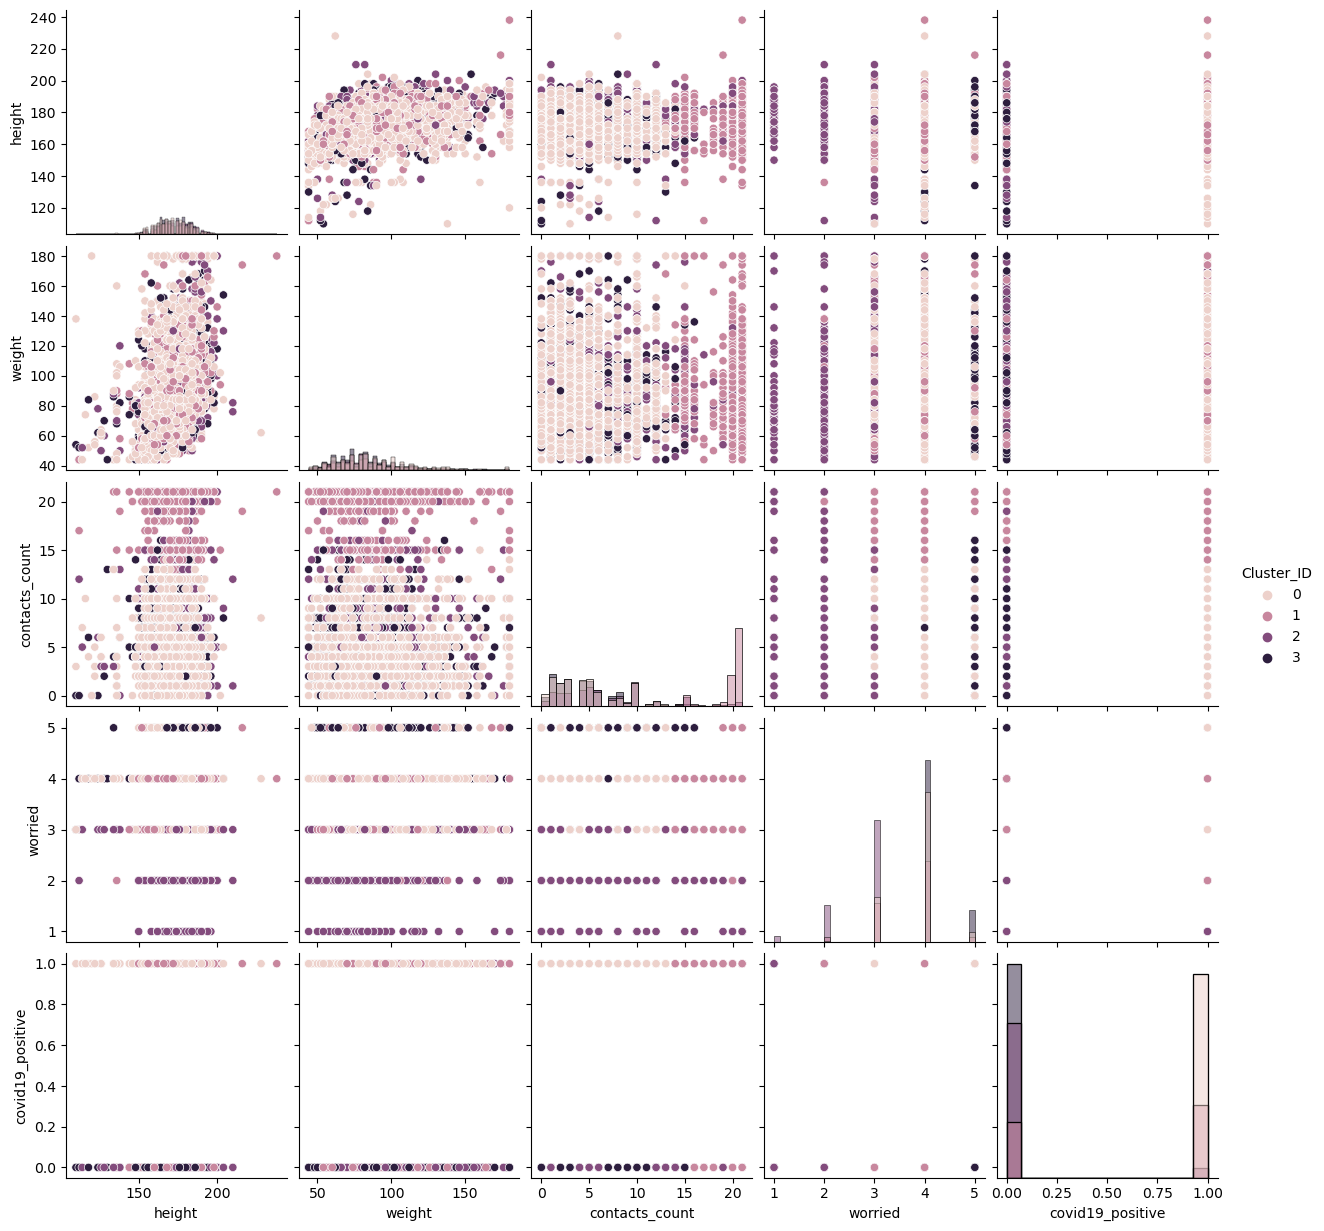

In [32]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

### b. Characterize the nature of each cluster by giving it a descriptive label and a brief description. Hint: visualize cluster distribution.

Distribution for cluster 0


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



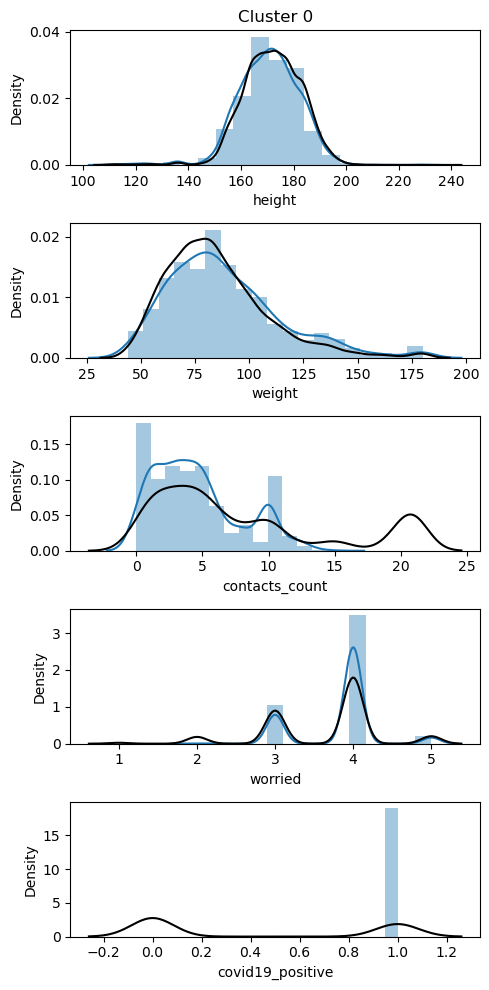

Distribution for cluster 1


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



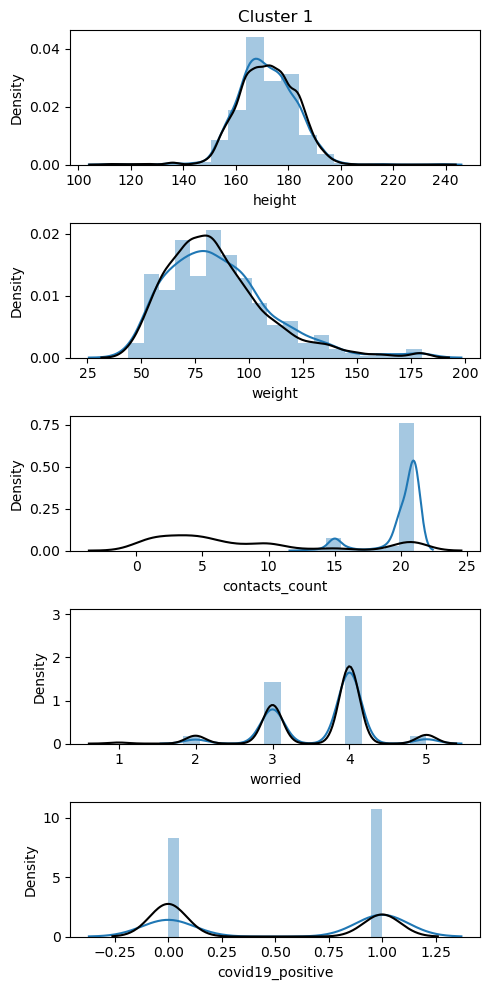

Distribution for cluster 2


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



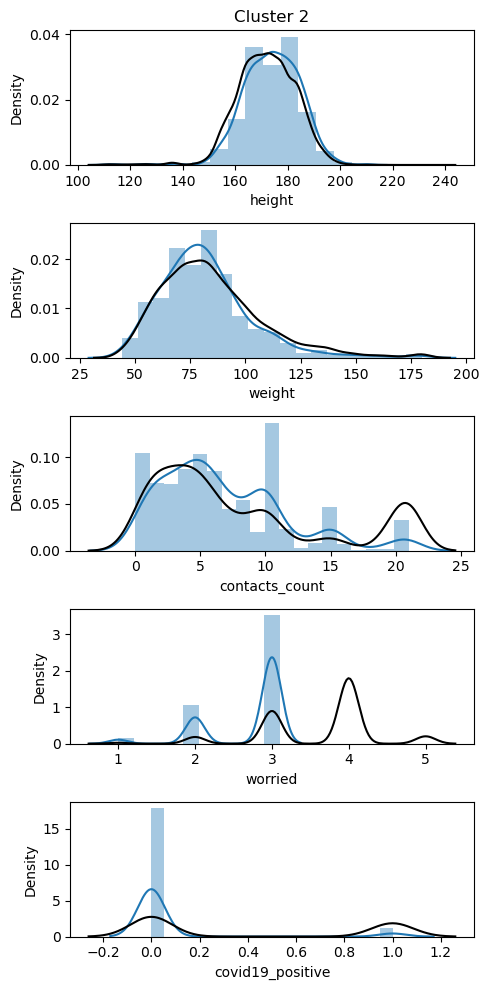

Distribution for cluster 3


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/2169861589.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



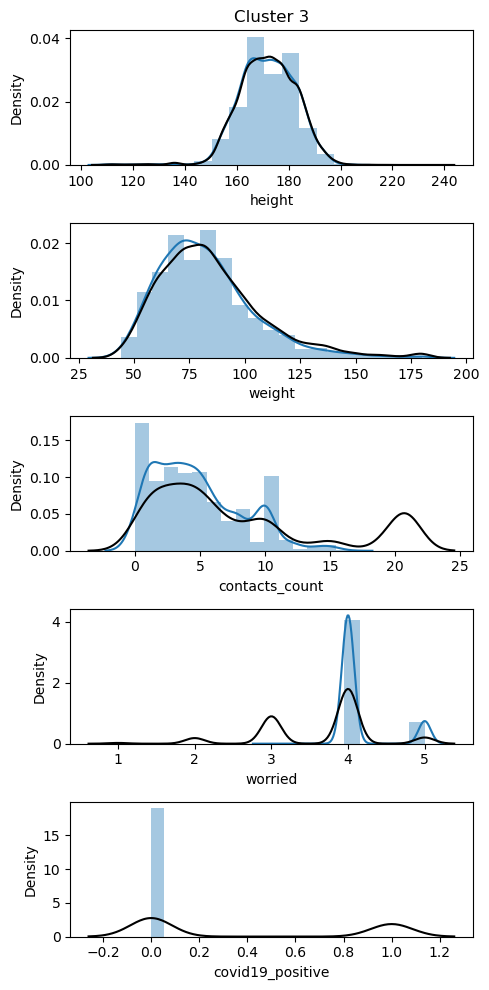

In [33]:
cols = ['height', 'weight', 'contacts_count','worried','covid19_positive']
n_bins = 20

clusters_to_inspect = [0,1,2,3]
cluster_labels = {0: "Minimal Intensity", 1: "Moderate Intensity", 2: "Enhanced Intensity", 3: "Critical Intensity"}


for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    fig, ax = plt.subplots(nrows=5, figsize =(5,10))
    ax[0].set_title("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

- cluster 0 (moderate height, moderate weight, low contacts count, lvl 4 worried, all infected) -> high infection
- cluster 1 (moderate height, moderate weight, high contacts count, lvl 3-4 worried, 50-50 infected) -> moderate infection
- cluster 2 (high height, moderate weight, moderate contacts count, lvl 3 worried, less infected) -> low infection
- cluster 3 (high height, moderate weight, low-moderate contects count, lvl 4-5 worried, no infected) -> no infection

### Now, build another clustering model by including the variable ‘Age’. Use the best setting (e.g., variable standardisation, optimal K, etc) obtained in the previous models. Answer the followings:
### a. What clustering algorithm have you used and why?

#### K prototype as it would incorporate the age variable (after mapping it to numerical values) along with other numerical variables seamlessly into the clustering process. This approach would ensure that the clustering algorithm considers all relevant features of the dataset appropriately, leading to potentially more meaningful clusters. it's crucial to understand that K-means operates based on distances between data points, which might not be meaningful for categorical variables, especially after mapping.

### converting age by mapping

In [34]:
# Define mapping between age ranges and numerical values
age_mapping = {
    '0_10': 5,
    '10_20': 15,
    '20_30': 25,
    '30_40': 35,
    '40_50': 45,
    '50_60': 55,
    '60_70': 65,
    '70_80': 75,
    '100_110': 105
}

# Apply mapping to age data
df['age_numeric'] = df['age'].map(age_mapping)

print(df)

      gender    age  height  weight blood_type insurance income    smoking  \
0       male  20_30     188     104         op       yes    med      never   
1     female  70_80     164      62         bp       yes    med      never   
2     female  40_50     164      78         op       yes    med      never   
3       male  40_50     170      60         bp       yes    med  yesmedium   
4     female  30_40     164      64         op       yes    med      never   
...      ...    ...     ...     ...        ...       ...    ...        ...   
5784    male  40_50     184      94         ap       yes    med     quit10   
5785  female  20_30     168      60         ap       yes    med      never   
5786  female  20_30     160      54         op       yes    med      never   
5787    male  40_50     190     138         op       yes    med      never   
5788    male  50_60     172      96         on       yes    med      never   

      alcohol  contacts_count              working  worried  co

In [35]:
print(df['age_numeric'].unique())
print(df['age_numeric'].value_counts())

[ 25  75  45  35  55  65  15   5 105]
age_numeric
35     1412
45     1111
25      996
55      926
65      765
75      354
15      205
5        14
105       6
Name: count, dtype: int64


In [36]:
print(df['age_numeric'].dtype)

int64


In [37]:
df3 = df.copy()
df3 = df3[['age_numeric','height', 'weight', 'contacts_count','worried','covid19_positive']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_numeric       5789 non-null   int64  
 1   height            5789 non-null   int64  
 2   weight            5789 non-null   int64  
 3   contacts_count    5789 non-null   float64
 4   worried           5789 non-null   float64
 5   covid19_positive  5789 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 271.5 KB


In [38]:
# take num variables and drop the rest
df3 = df3[['age_numeric','height', 'weight', 'contacts_count','worried','covid19_positive']]

# convert df2 to matrix
X = df3.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [40]:
# list to save the clusters and cost
clusters = []
cost_vals = []
# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[0,5])
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

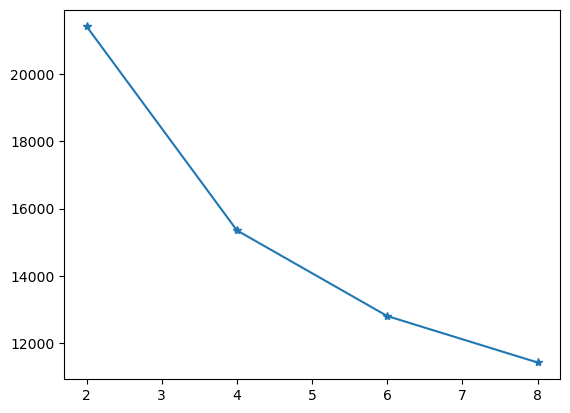

In [41]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

By applying the elbow method on the above plot, the optimal value for lies between 4 and 6. The silhouette
score has to be calculated to find the optimal value.

In [43]:
X_num = [[row[1], row[2], row[3], row[4]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[0], row[5]] for row in X] # variables of X with categorical datatype

In [44]:
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4

In [45]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[0,5]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[0,5]), metric='hamming') 
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[0,5]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[0,5]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[0,5]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[0,5]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[0,5]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[0,5]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

Silscore for numeric variables: 0.26402486031468053
Silscore for categorical variables: -0.06423491150949923
The avg Silhouette score for k=4: 0.09989497440259065
The avg Silhouette score for k=6: 0.07196414188426575
The avg Silhouette score for k=8: 0.07127187336319907


Cluster membership
Cluster_ID
3    1889
0    1483
1    1347
2    1070
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

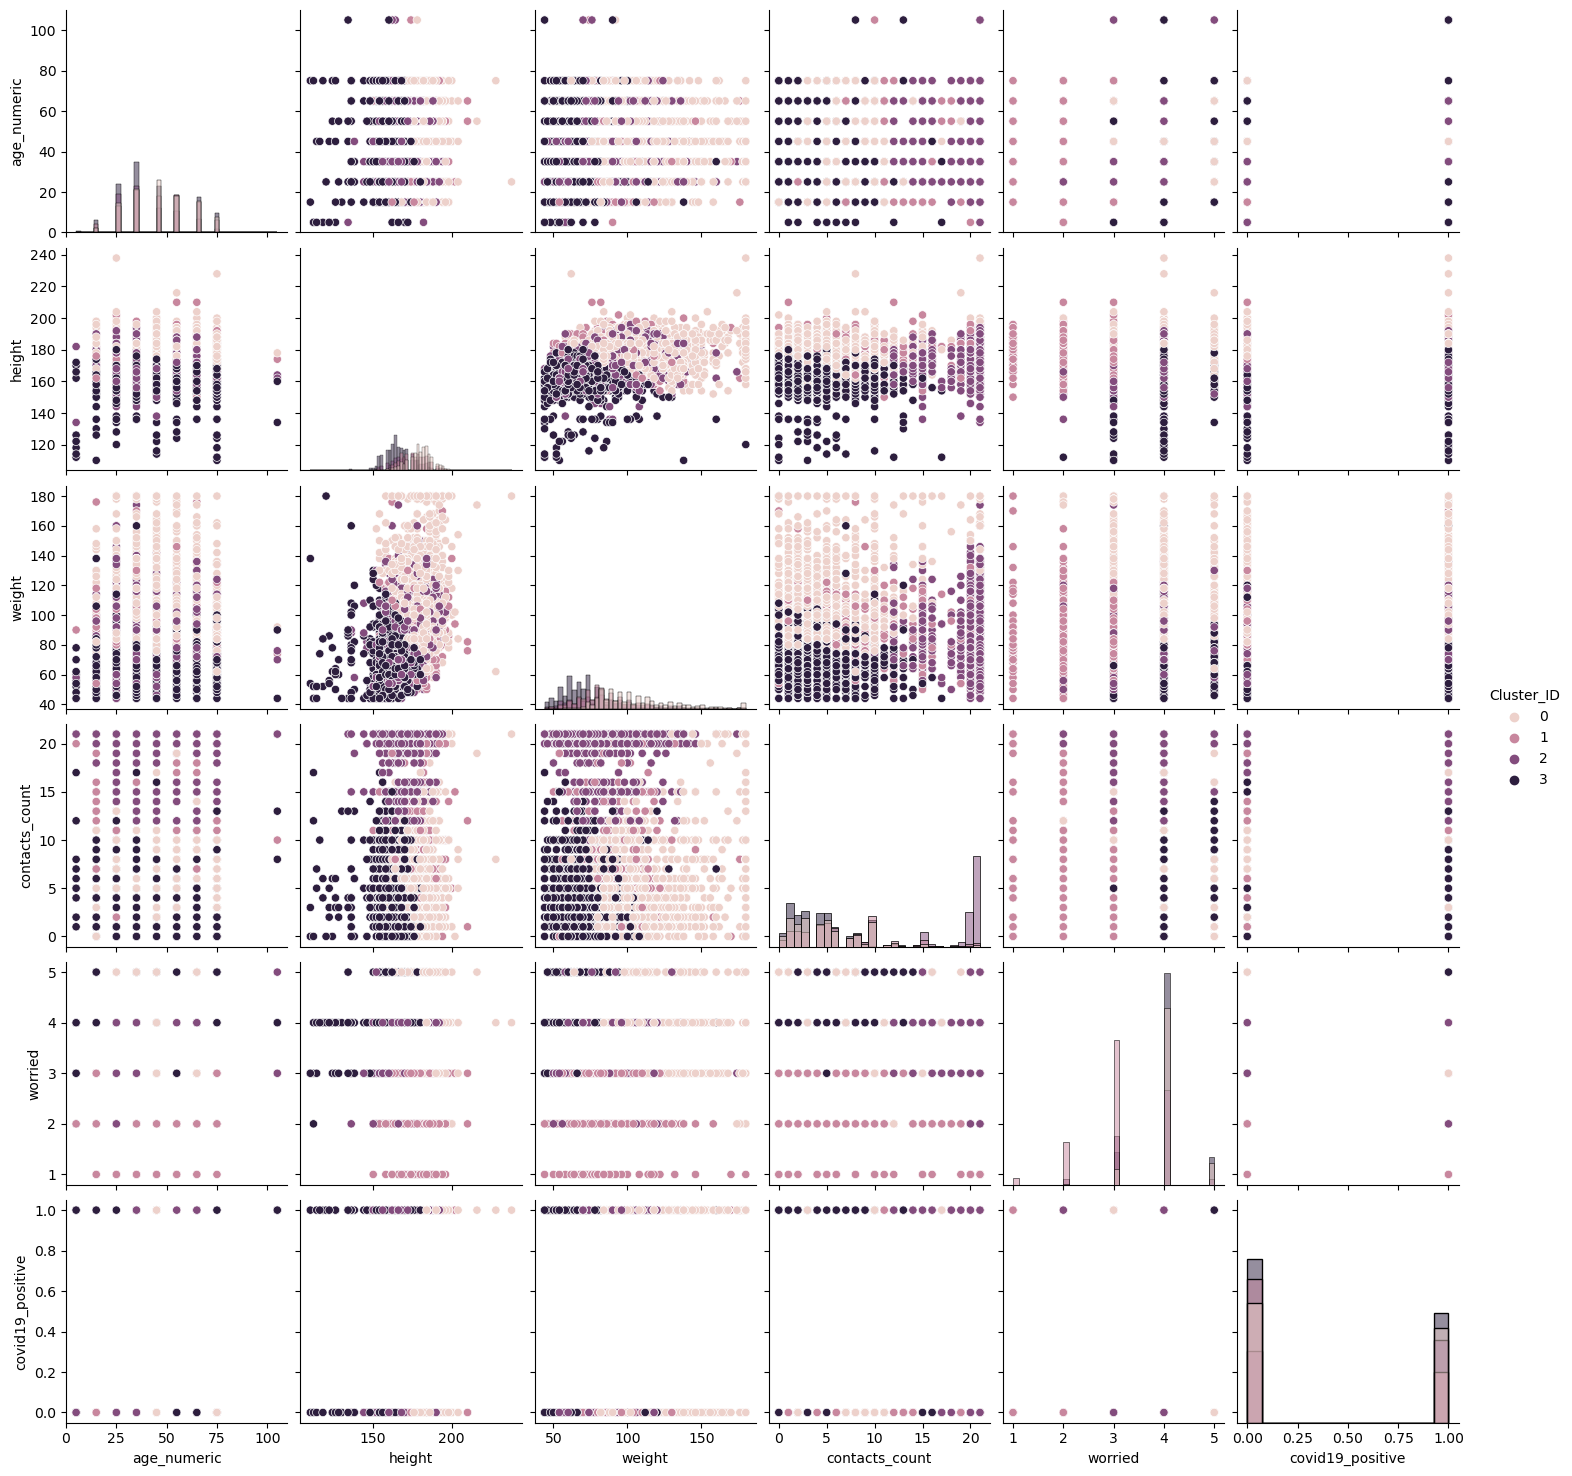

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]

y=model.fit_predict(X, categorical=[0,5]) 
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

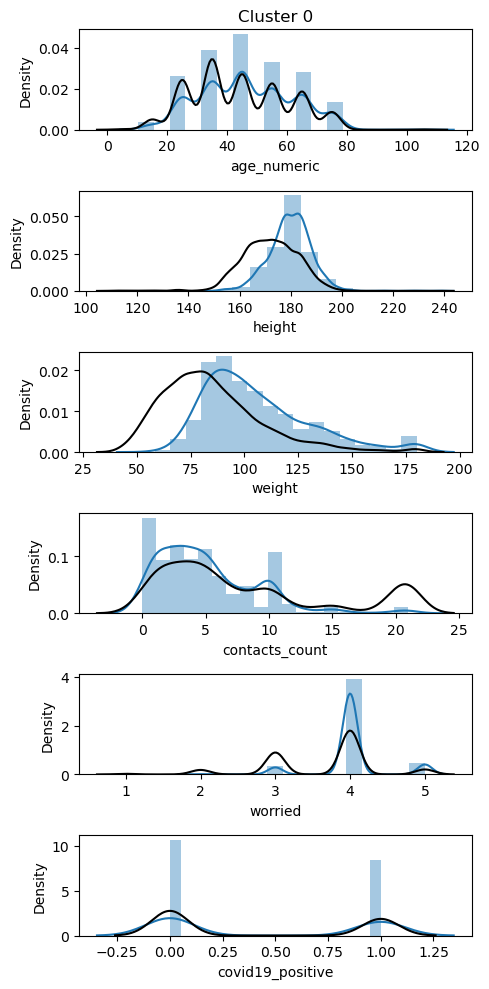

Distribution for cluster 1


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

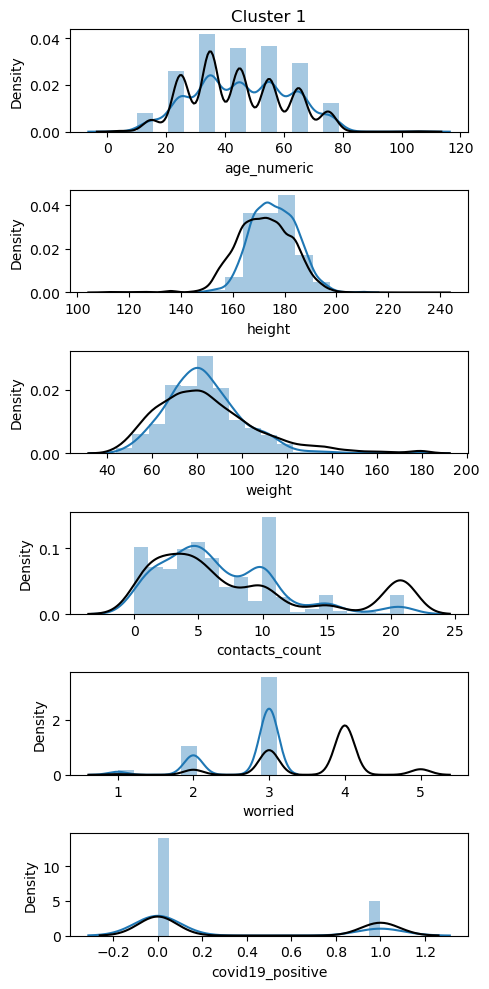

Distribution for cluster 2


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

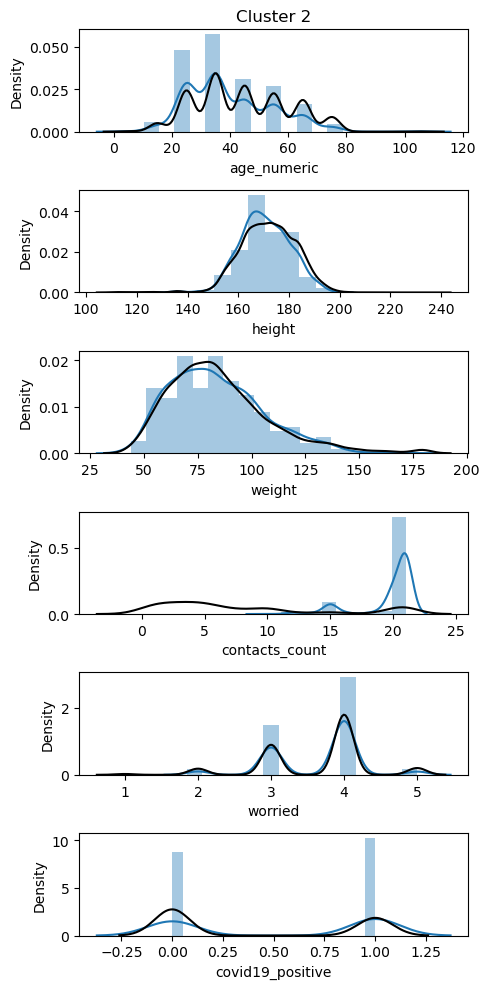

Distribution for cluster 3


/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/xz/ch0jc2wd4ts6vsjy28f_882h0000gn/T/ipykernel_27572/528281996.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

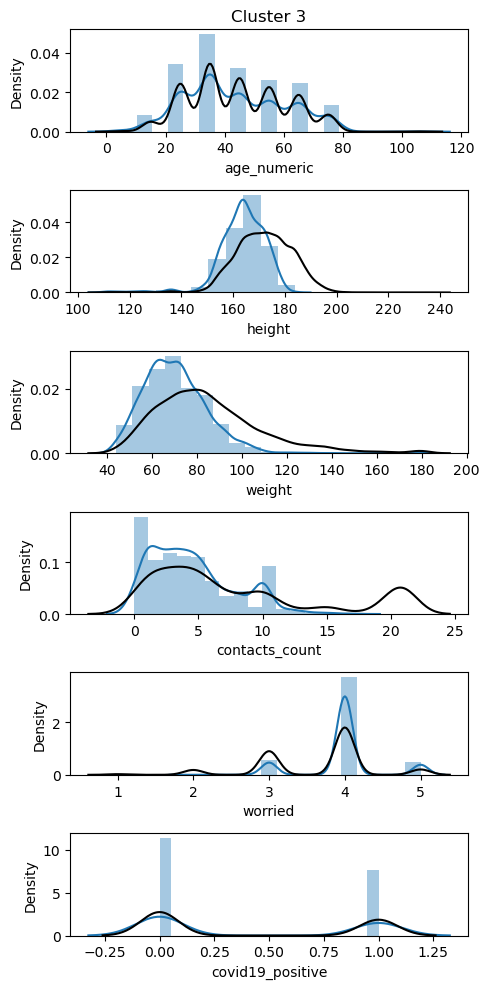

In [47]:
cols = ['age_numeric','height', 'weight', 'contacts_count','worried','covid19_positive']
n_bins = 20

clusters_to_inspect = [0,1,2,3]
cluster_labels = {0: "Minimal Intensity", 1: "Moderate Intensity", 2: "Enhanced Intensity", 3: "Critical Intensity"}


for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    fig, ax = plt.subplots(nrows=6, figsize =(5,10))
    ax[0].set_title("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df3[col]), max(df3[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

### b. What difference do you see in this clustering interpretation when compared to the previous one (task 3)?

- cluster 0 (20-40 age, moderate height, moderate-high weight, high contacts count, 3-4 worried, 40-60 infected) -> moderate infection 
- cluster 1 (25-45 age, moderate height, moderate-high weight, low contacts count, lvl 4 worried, all infected) -> high infection
- cluster 2 (30-70 age, moderate height, moderate weight, low-moderate contacts count, lvl 4-5 worried, no infected) -> no infection
- cluster 3 (30-70 age, moderate height, moderate weight, low-moderate contacts count, lvl 3 worried, slightly infected) -> low infection

previous:

- cluster 0 (moderate height, moderate weight, low contacts count, lvl 4 worried, all infected) -> high infection
- cluster 1 (moderate height, moderate weight, high contacts count, lvl 3-4 worried, 50-50 infected) -> moderate infection
- cluster 2 (high height, moderate weight, moderate contacts count, lvl 3 worried, less infected) -> low infection
- cluster 3 (high height, moderate weight, low-moderate contects count, lvl 4-5 worried, no infected) -> no infection

### 5. In what ways can the results of this task be utilized by the relevant decision-makers?

-  COVID 19 targeted campaigns: tailor public health campaigns, communication strategies, and preventive measures to address the needs and concerns of different clusters effectively.
- risk assessment -> prioritizing vaccination efforts, implementing protective measures in high-risk individuals, and providing support to vulnerable populations.